# Multiple Linear Regression
## Shared Bikes Demand Prediction

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**So interpretation is important!**

The solution is divided into the following sections:
- Data understanding and exploration
- Data Visualisation
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [ ]:
import pandas as pd

# Assuming the uploaded file is named "day.csv"
df = pd.read_csv("day.csv")

In [ ]:
print(df)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      

In [ ]:
# Let's look at the number of rows and columns in the dataset
df.shape

(730, 16)

In [ ]:
# Understanding the feature names in the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Getting insights of the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [ ]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
df.loc[(df['season'] == 1) , 'season'] = 'spring'

# 2=summer
df.loc[(df['season'] == 2) , 'season'] = 'summer'

# 3=fall
df.loc[(df['season'] == 3) , 'season'] = 'fall'

# 4=winter
df.loc[(df['season'] == 4) , 'season'] = 'winter'

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
df['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [ ]:
# year (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [ ]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
df[['mnth']] = df[['mnth']].apply(object_map)

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
df['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [ ]:
# whether day is a holiday or not (0: No, 1: Yes)
df['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [ ]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
df[['weekday']] = df[['weekday']].apply(str_map)

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df['weekday'].astype('category').value_counts()

weekday
Thurs    105
Wed      105
Fri      104
Mon      104
Sat      104
Sun      104
Tues     104
Name: count, dtype: int64

In [ ]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [ ]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'D'

In [ ]:
# Extracting the type of weather situations present in the data
df['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [ ]:
# Taking count based on weather situations
df['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

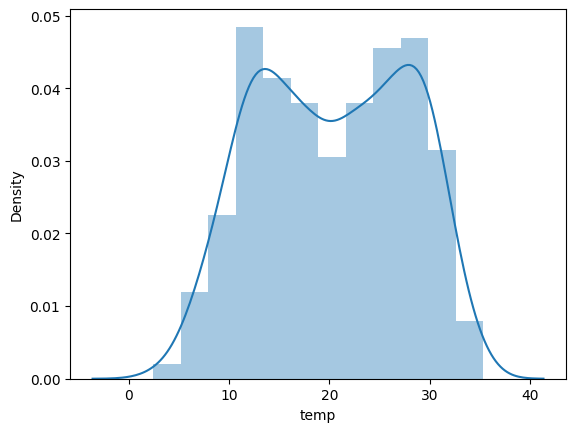

In [ ]:
# temperature
sns.distplot(df['temp'])
plt.show()

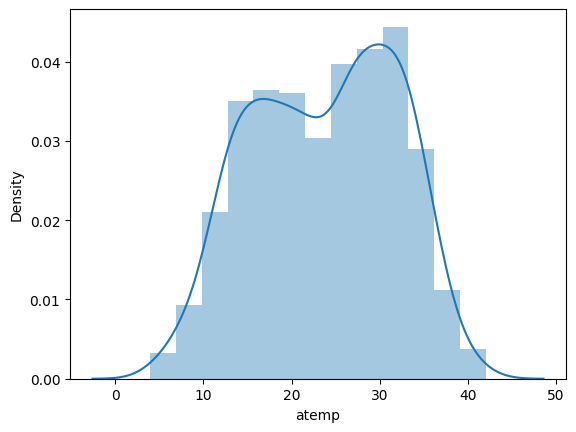

In [ ]:
# feeling temperature
sns.distplot(df['atemp'])
plt.show()

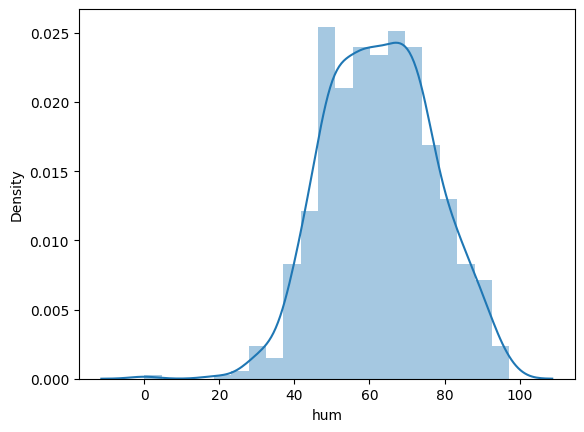

In [ ]:
# humidity
sns.distplot(df['hum'])
plt.show()

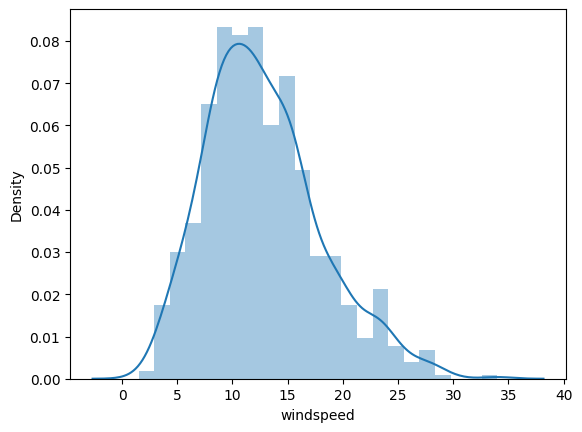

In [ ]:
# wind speed
sns.distplot(df['windspeed'])
plt.show()

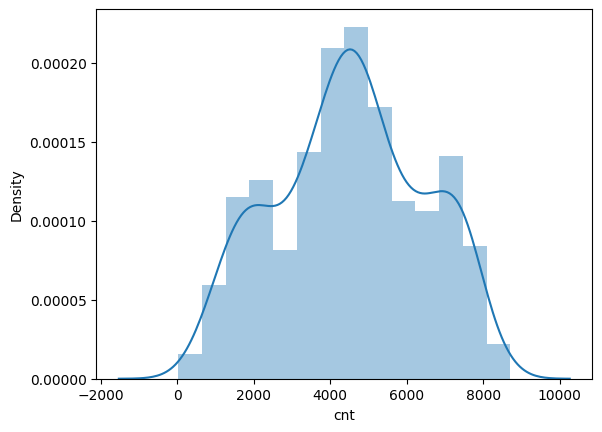

In [ ]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')


In [ ]:
# All categorical variables in the dataset
BS_day_categorical=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [ ]:
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

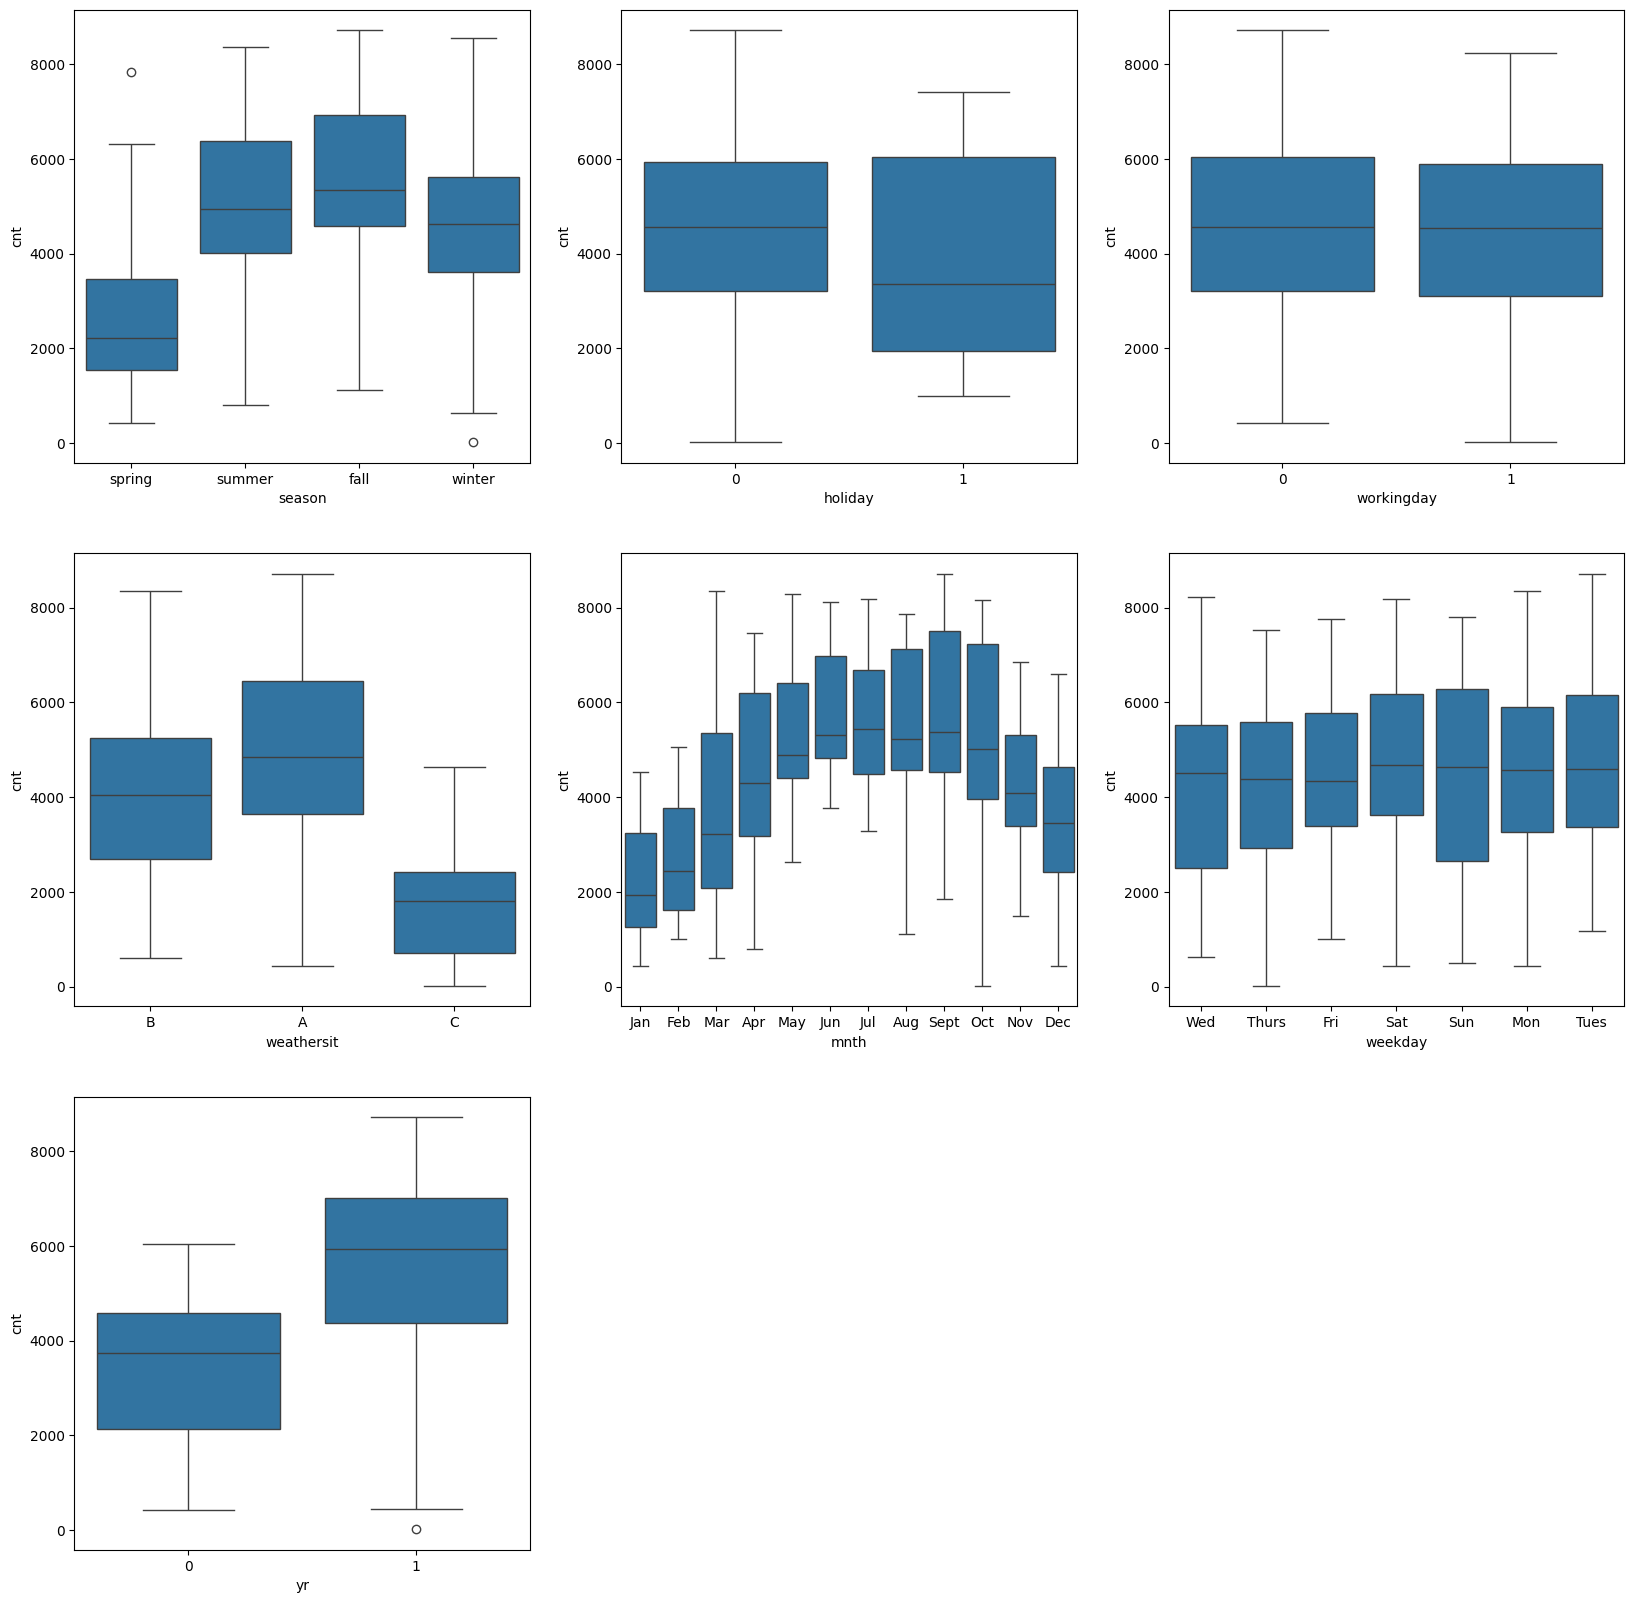

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [ ]:
# Converting "casual","registered" and "cnt" numeric variables to float.
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    df[var] = df[var].astype("float")
#BS_day['casual']= BS_day['casual'].astype('float')
#BS_day['registered']=BS_day['registered'].astype('float')
#BS_day['cnt']=BS_day['cnt'].astype('float')
#BS_day.head()

In [ ]:
# All numeric variables in the dataset
BS_day_numeric = df.select_dtypes(include=['float64'])
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


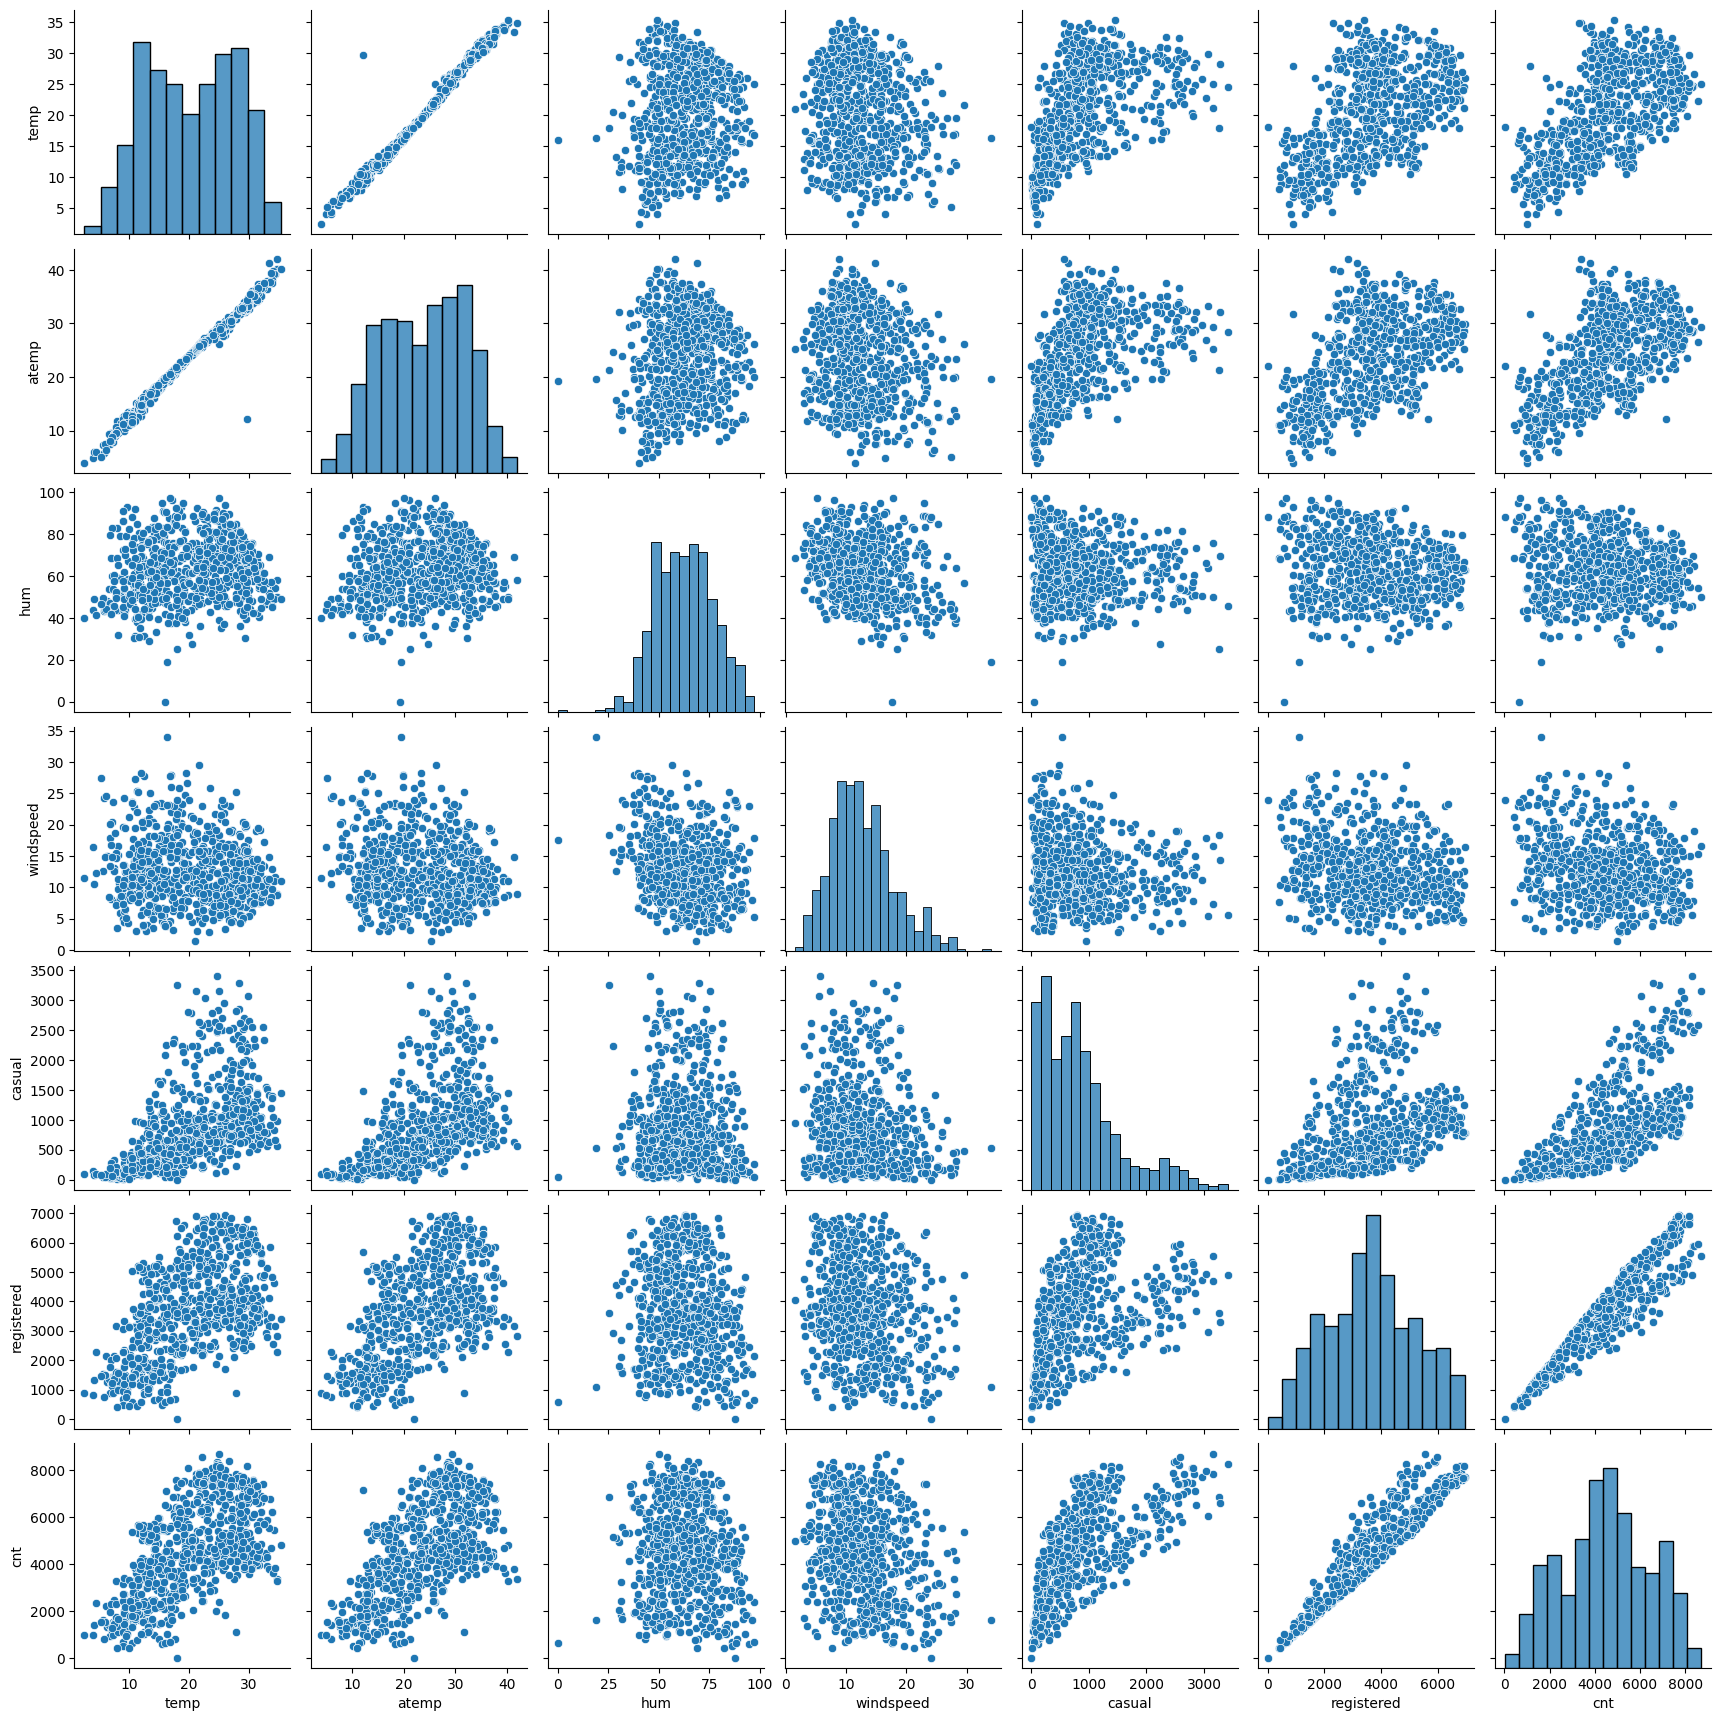

In [ ]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [ ]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

<Axes: >

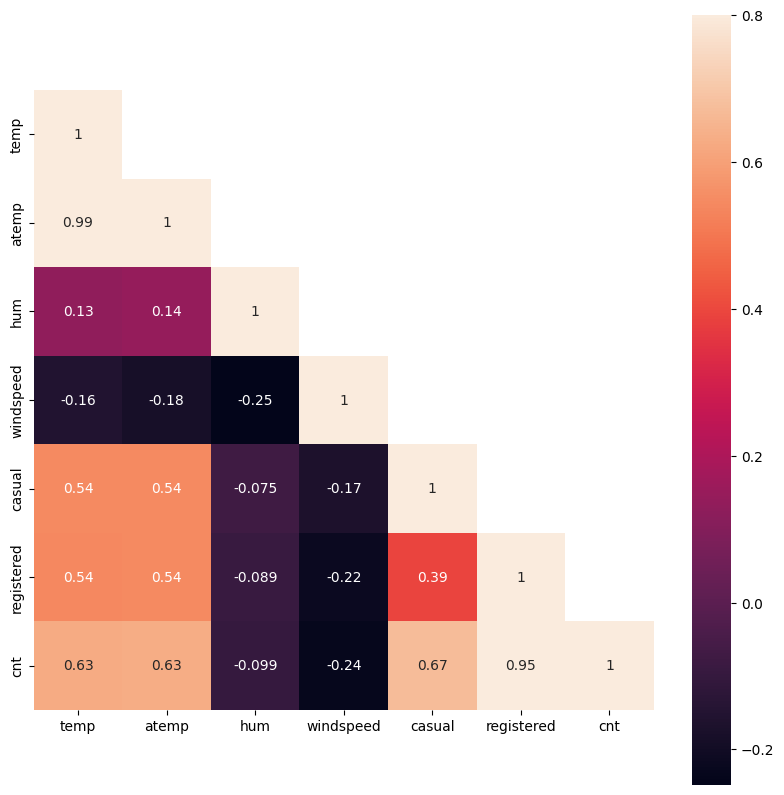

In [ ]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [ ]:
#removing atemp as it is highly correlated with temp
BS_day_numeric.drop('atemp',axis=1,inplace=True)

## 3. Data Preparation


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [ ]:
# Print the DataFrame BS_day_numeric to inspect its contents
print(BS_day_numeric.head())

# Check the data types of columns in BS_day_numeric
print(BS_day_numeric.dtypes)

# Subset all categorical variables
BS_day_categorical = BS_day_numeric.select_dtypes(include=['object'])

# Print BS_day_categorical to inspect its contents
print(BS_day_categorical.head())


        temp      hum  windspeed  casual  registered     cnt
0  14.110847  80.5833  10.749882   331.0       654.0   985.0
1  14.902598  69.6087  16.652113   131.0       670.0   801.0
2   8.050924  43.7273  16.636703   120.0      1229.0  1349.0
3   8.200000  59.0435  10.739832   108.0      1454.0  1562.0
4   9.305237  43.6957  12.522300    82.0      1518.0  1600.0
temp          float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers.

For this, we will use something called `dummy variables`.

In [ ]:
# Print the data types of all columns in BS_day_numeric
print(BS_day_numeric.dtypes)

# Inspect the contents of BS_day_numeric to understand its structure
print(BS_day_numeric.head())
# Check if BS_day_numeric contains any columns with object data type (categorical variables)
if 'object' in BS_day_numeric.dtypes.values:
    # Subset all categorical variables
    BS_day_categorical = BS_day_numeric.select_dtypes(include=['object'])

    # Check if BS_day_categorical is not empty
    if not BS_day_categorical.empty:
        # Convert categorical variables into dummy variables
        BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
        print(BS_day_dummies.head())  # Print the head of BS_day_dummies for inspection
    else:
        print("No categorical variables found in BS_day_numeric. Please check the data.")
else:
    print("No columns with object data type (categorical variables) found in BS_day_numeric.")


temp          float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object
        temp      hum  windspeed  casual  registered     cnt
0  14.110847  80.5833  10.749882   331.0       654.0   985.0
1  14.902598  69.6087  16.652113   131.0       670.0   801.0
2   8.050924  43.7273  16.636703   120.0      1229.0  1349.0
3   8.200000  59.0435  10.739832   108.0      1454.0  1562.0
4   9.305237  43.6957  12.522300    82.0      1518.0  1600.0
No columns with object data type (categorical variables) found in BS_day_numeric.


In [ ]:
# Drop categorical variable columns
BS_day_numeric = BS_day_numeric.drop(list(BS_day_categorical.columns), axis=1)

In [ ]:
# Assuming BS_day_categorical is defined and contains categorical variables
if not BS_day_categorical.empty:
    # Convert categorical variables into dummy variables
    BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
    print(BS_day_dummies.head())  # Print the head of BS_day_dummies for inspection

    # Assuming BS_day is defined and contains valid data
    # Concatenate dummy variables with the original DataFrame
    BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)
    print("Concatenation successful.")
else:
    print("BS_day_categorical is empty. Please check the data.")



BS_day_categorical is empty. Please check the data.


In [ ]:
# Let's check the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [ ]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
df_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,4,1,10,0,3,1,1,19.201653,23.04230,55.8333,12.208807,922,6612,7534
576,3,1,7,0,3,1,1,29.246653,33.14480,70.4167,11.083475,968,6248,7216
426,1,1,3,0,0,0,2,16.980847,20.67460,62.1250,10.792293,956,3110,4066
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
482,2,1,4,0,0,0,2,15.443347,18.87520,48.9583,8.708325,1120,3100,4220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2,1,6,0,2,1,2,29.554153,32.98605,58.7917,13.916771,1017,5647,6664
578,3,1,8,0,5,1,1,30.852500,35.35440,65.9583,8.666718,983,6278,7261
53,1,0,2,0,5,1,1,9.091299,12.28585,42.3043,6.305571,139,1778,1917
350,4,0,12,0,1,1,2,10.591653,12.46855,56.0833,16.292189,275,2464,2739


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [ ]:
df_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,4,1,10,0,3,1,1,0.509887,23.04230,0.575354,0.300794,0.280402,0.951776,0.864243
576,3,1,7,0,3,1,1,0.815169,33.14480,0.725633,0.264686,0.294422,0.899220,0.827658
426,1,1,3,0,0,0,2,0.442393,20.67460,0.640189,0.255342,0.290765,0.446145,0.465255
728,1,1,12,0,1,1,1,0.245101,11.58500,0.498067,0.663106,0.110332,0.203869,0.204096
482,2,1,4,0,0,0,2,0.395666,18.87520,0.504508,0.188475,0.340750,0.444701,0.482973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2,1,6,0,2,1,2,0.824514,32.98605,0.605840,0.355596,0.309357,0.812446,0.764151
578,3,1,8,0,5,1,1,0.863973,35.35440,0.679690,0.187140,0.298994,0.903552,0.832835
53,1,0,2,0,5,1,1,0.202618,12.28585,0.435939,0.111379,0.041756,0.253826,0.218017
350,4,0,12,0,1,1,2,0.248216,12.46855,0.577930,0.431816,0.083206,0.352873,0.312586


As expected, the variables have been appropriately scaled.

In [ ]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.517647,0.507843,6.549020,0.025490,2.950980,0.711765,1.401961,0.537262,23.493909,0.650369,0.320768,0.254661,0.523944,0.513620
std,1.111947,0.500429,3.468714,0.157763,1.977166,0.453386,0.547540,0.225844,8.090038,0.145882,0.169797,0.206011,0.228175,0.224593
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.339853,16.603063,0.538643,0.199179,0.094179,0.353487,0.356420
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.212740,0.525123,0.518638
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.735215,30.177700,0.754830,0.414447,0.327415,0.696073,0.684710
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000


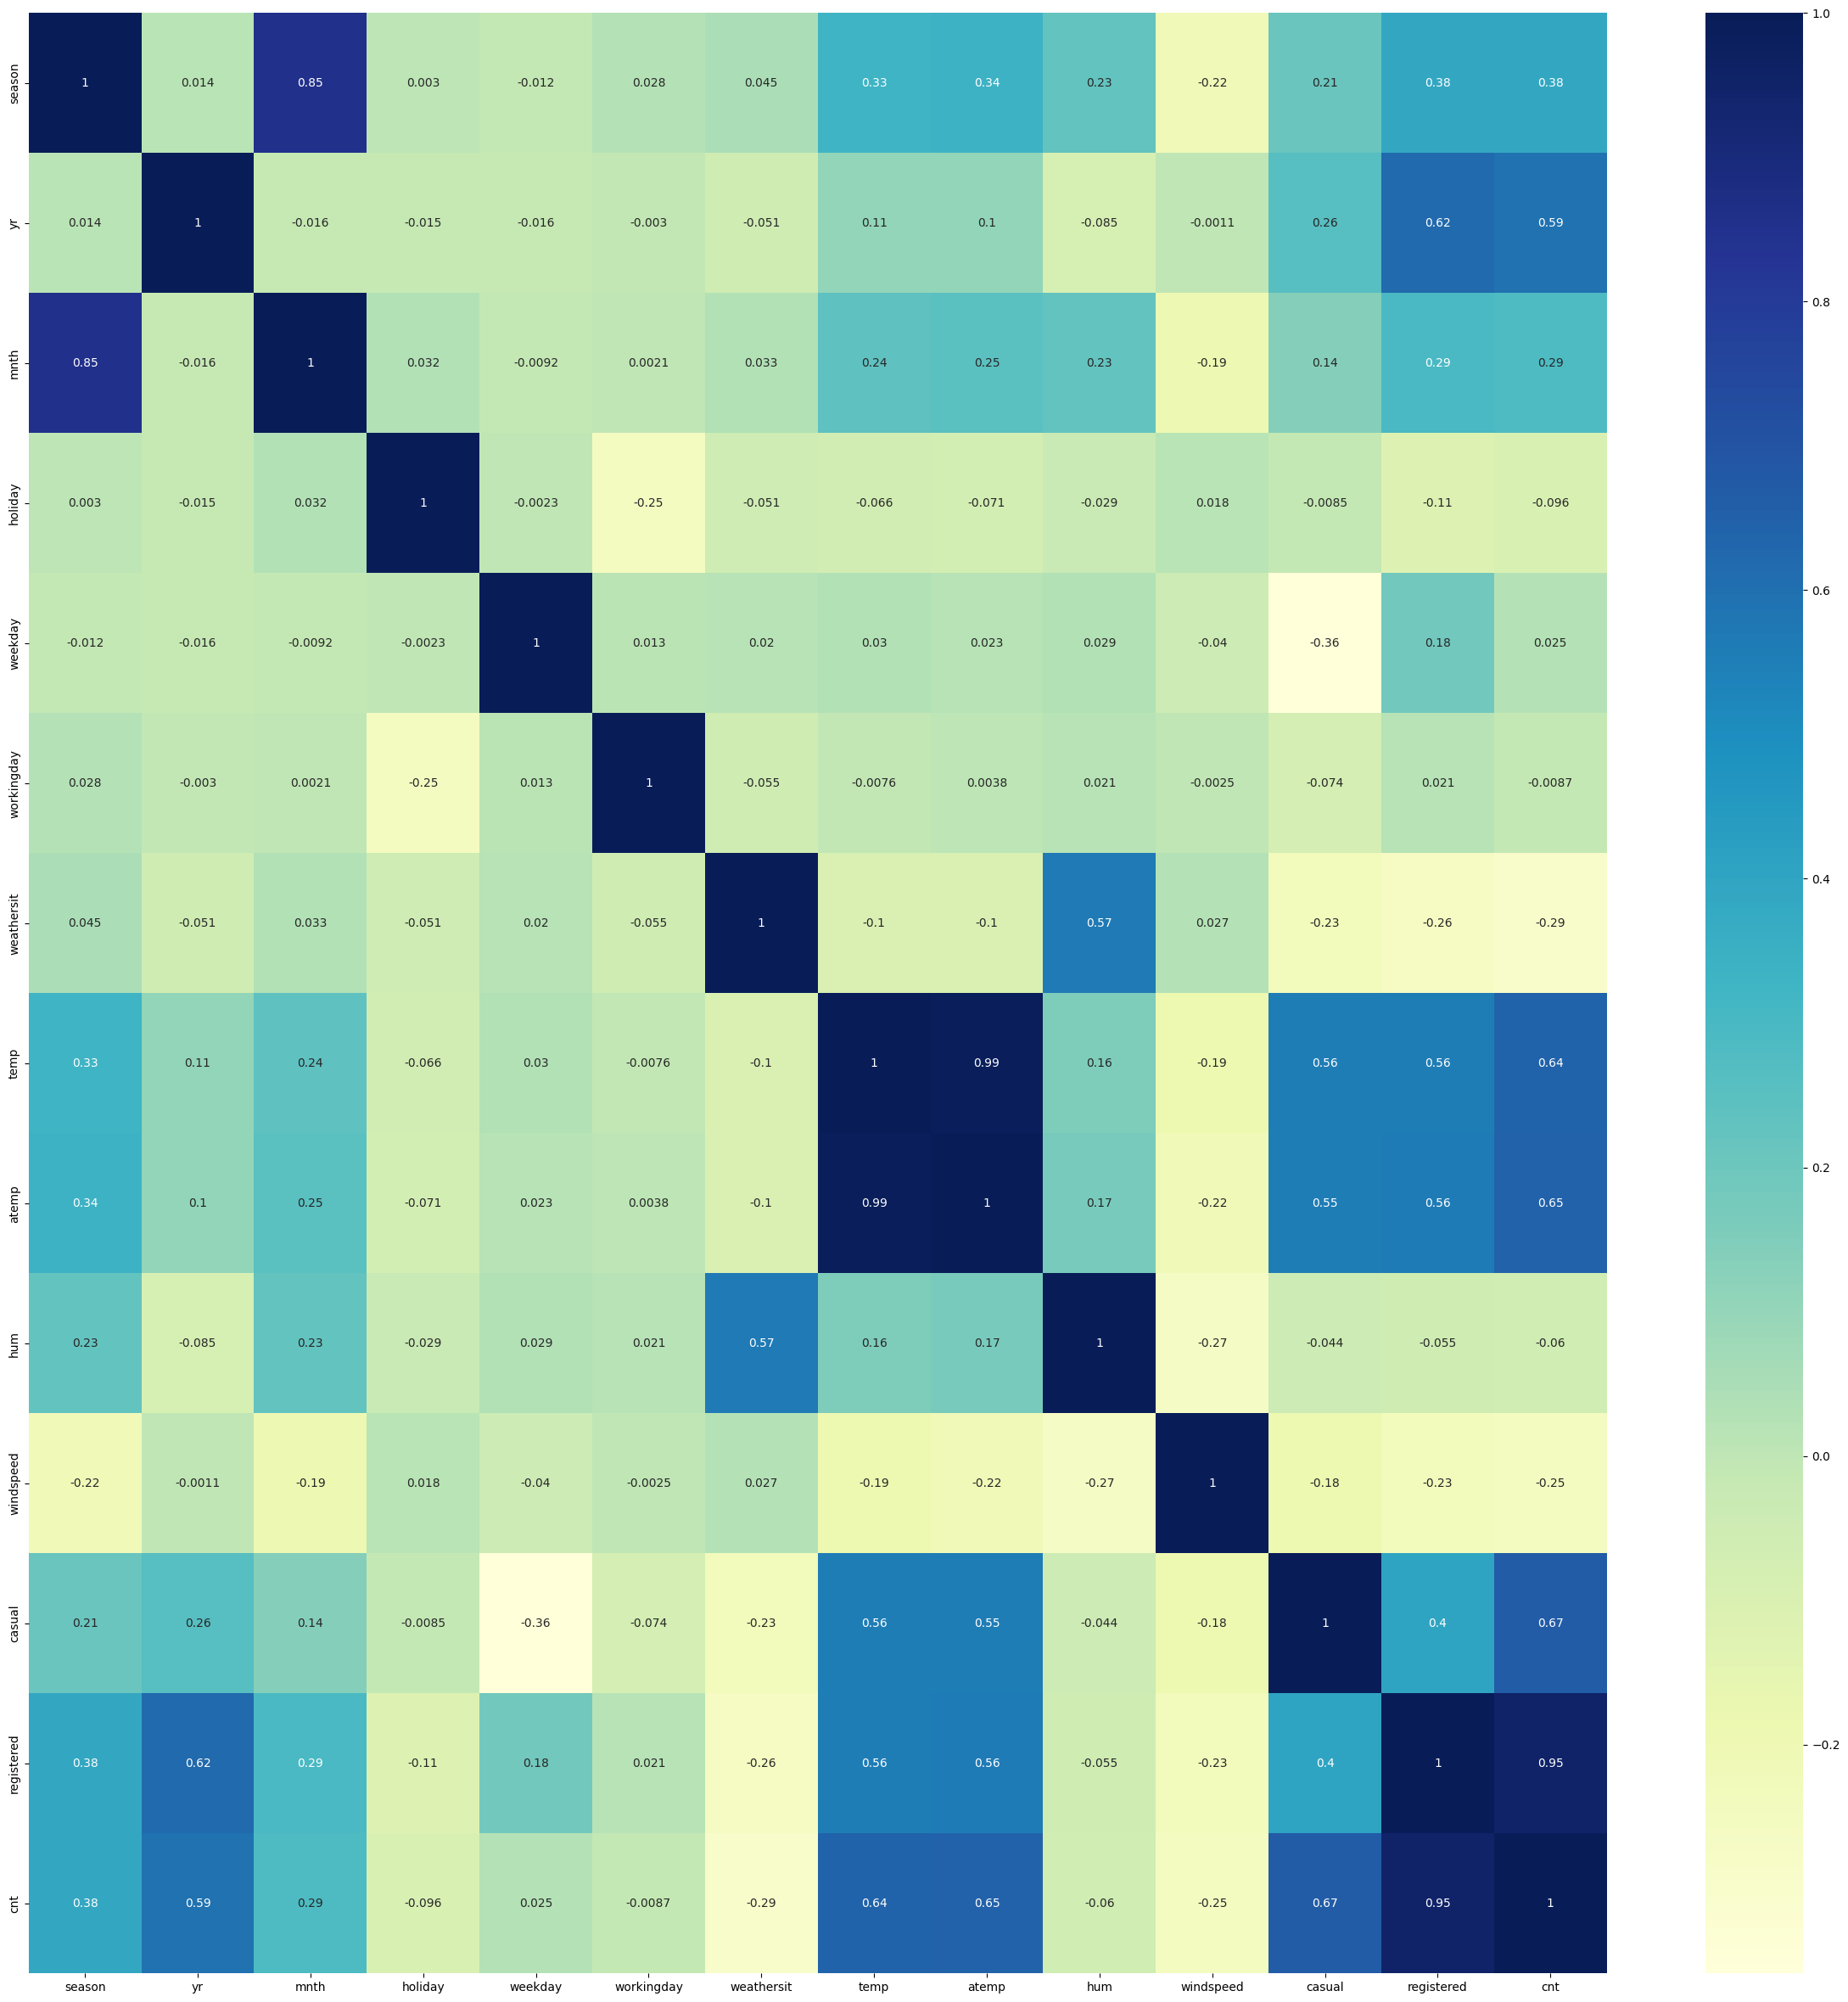

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

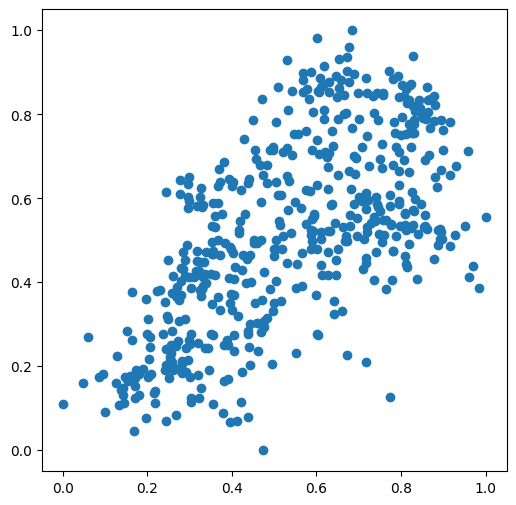

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [ ]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1)

In [ ]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
653,4,1,10,0,3,1,1,0.509887,23.0423,0.575354,0.300794
576,3,1,7,0,3,1,1,0.815169,33.1448,0.725633,0.264686
426,1,1,3,0,0,0,2,0.442393,20.6746,0.640189,0.255342
728,1,1,12,0,1,1,1,0.245101,11.5850,0.498067,0.663106
482,2,1,4,0,0,0,2,0.395666,18.8752,0.504508,0.188475


In [ ]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[ 4.        ,  1.        , 10.        , ...,  0.30079362,
         0.28040232,  0.95177592],
       [ 3.        ,  1.        ,  7.        , ...,  0.26468552,
         0.29442243,  0.89922033],
       [ 1.        ,  1.        ,  3.        , ...,  0.25534248,
         0.29076501,  0.44614496],
       ...,
       [ 1.        ,  0.        ,  2.        , ...,  0.11137874,
         0.04175556,  0.25382616],
       [ 4.        ,  0.        , 12.        , ...,  0.43181554,
         0.08320634,  0.35287323],
       [ 2.        ,  0.        ,  3.        , ...,  0.52988098,
         0.12160927,  0.23909905]])

In [ ]:
X_train.shape

(510, 11)

### Building the first model with all the features

Let's now build our first model with all the features.

In [ ]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.234751
season        0.047552
yr            0.233638
mnth         -0.001413
holiday      -0.107185
weekday       0.002785
workingday   -0.020678
weathersit   -0.078638
temp          0.220863
atemp         0.007191
hum          -0.104143
windspeed    -0.157880
dtype: float64

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.04755177  0.23363777 -0.00141304 -0.10718468  0.00278491 -0.02067808
 -0.07863845  0.22086265  0.00719104 -0.10414293 -0.15788029]
0.23475103274426512


In [ ]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          9.22e-167
Time:                        06:12:44   Log-Likelihood:                 450.44
No. Observations:                 510   AIC:                            -876.9
Df Residuals:                     498   BIC:                            -826.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2348      0.035      6.722      0.000       0.166       0.303
season         0.0476      0.008      5.932      0.000       0.032       0.063
yr             0.2336      0.009     25.734      0.000       0.216       0.251
mnth          -0.0014      0.003     -0.565      0.573      -0.006       0.004
holiday       -0.1072      0.030     -3.616      0.000      -0.165      -0.049
weekday        0.0028      0.002      1.223      0.222      -0.002       0.007
workingday    -0.0207      0.010     -2.001      0.046      -0.041      -0.000
weathersit    -0.0786      0.011     -7.423      0.000      -0.099      -0.058
temp           0.2209      0.141      1.567      0.118      -0.056       0.498
atemp          0.0072      0.004      1.811      0.071      -0.001       0.015
hum           -0.1041      0.042     -2.493      0.013      -0.186      -0.022
windspeed     -0.1579      0.029     -5.445      0.000      -0.215      -0.101
==============================================================================
Omnibus:                       61.619   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.341
Skew:                          -0.664   Prob(JB):                     4.08e-30
Kurtosis:                       5.146   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [ ]:
# Import RFE - Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are defined and contain the training features and target respectively

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)  # Provide estimator and number of features to select

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


#### Model Building and Evaluation

Let's now check the summary of this model using `statsmodels`.

In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
653,1.0,4,1,10,0,3,1,1,0.509887,23.0423,0.575354,0.300794
576,1.0,3,1,7,0,3,1,1,0.815169,33.1448,0.725633,0.264686
426,1.0,1,1,3,0,0,0,2,0.442393,20.6746,0.640189,0.255342
728,1.0,1,1,12,0,1,1,1,0.245101,11.5850,0.498067,0.663106
482,1.0,2,1,4,0,0,0,2,0.395666,18.8752,0.504508,0.188475


In [ ]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          9.22e-167
Time:                        06:13:56   Log-Likelihood:                 450.44
No. Observations:                 510   AIC:                            -876.9
Df Residuals:                     498   BIC:                            -826.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2348      0.035      6.722      0.0

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variance Inflation Factor

Variance Inflation Factor (VIF) measures the multicollinearity among predictor variables in a regression model. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. This can cause issues such as inflated standard errors of coefficients, which can lead to inaccurate hypothesis testing and unreliable interpretations of the model.

By calculating VIF values for each feature variable, you can assess the extent of multicollinearity in your regression model. Generally, a VIF value greater than 5 or 10 indicates a high degree of multicollinearity, suggesting that the corresponding variable may need to be addressed, either by removing it from the model or by using techniques like principal component analysis (PCA) to address multicollinearity.

In [ ]:
a=X_train_rfe1.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,351.84
7,temp,256.83
9,hum,31.14
0,season,24.02
2,mnth,17.10
6,weathersit,12.64
10,windspeed,3.85
5,workingday,3.68
4,weekday,3.10
1,yr,2.03


In [ ]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are defined and contain the training features and target respectively

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)  # Provide estimator and number of features to select

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)
print(rfe2.ranking_)


[ True  True False  True False False  True  True False  True  True]
[1 1 5 1 4 2 1 1 3 1 1]


In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,season,yr,holiday,weathersit,temp,hum,windspeed
653,1.0,4,1,0,1,0.509887,0.575354,0.300794
576,1.0,3,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,1,0,2,0.442393,0.640189,0.255342
728,1.0,1,1,0,1,0.245101,0.498067,0.663106
482,1.0,2,1,0,2,0.395666,0.504508,0.188475


In [ ]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Thu, 02 May 2024   Prob (F-statistic):          8.90e-170
Time:                        06:15:03   Log-Likelihood:                 446.23
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     502   BIC:                            -842.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2625      0.028      9.290      0.0

Now let's check the VIF for these selected features and decide further.

In [ ]:
b=X_train_rfe2.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,23.16
3,weathersit,12.35
4,temp,7.59
0,season,6.97
6,windspeed,3.56
1,yr,2.00
2,holiday,1.03


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [ ]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,season,yr,holiday,weathersit,temp,windspeed
653,1.0,4,1,0,1,0.509887,0.300794
576,1.0,3,1,0,1,0.815169,0.264686
426,1.0,1,1,0,2,0.442393,0.255342
728,1.0,1,1,0,1,0.245101,0.663106
482,1.0,2,1,0,2,0.395666,0.188475
...,...,...,...,...,...,...,...
526,1.0,2,1,0,2,0.824514,0.355596
578,1.0,3,1,0,1,0.863973,0.187140
53,1.0,1,0,0,1,0.202618,0.111379
350,1.0,4,0,0,2,0.248216,0.431816


In [ ]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     325.6
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.21e-169
Time:                        06:15:23   Log-Likelihood:                 442.93
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     503   BIC:                            -842.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2176      0.022      9.773      0.0

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [ ]:
c=X_train_rfe2.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,6.22
4,temp,6.16
3,weathersit,5.43
5,windspeed,3.52
1,yr,2.00
2,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.1%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [ ]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

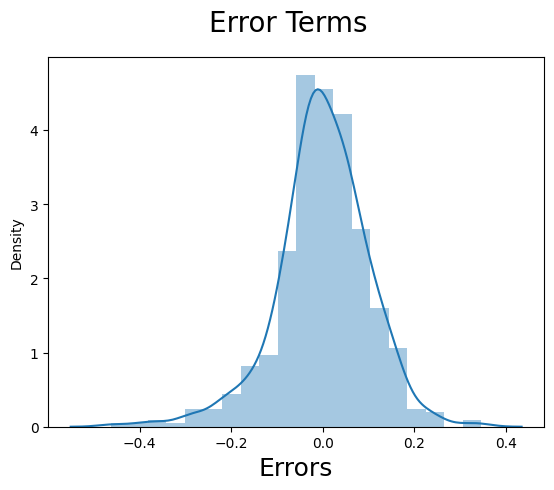

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [ ]:
X_train_rfe2

,const,season,yr,holiday,weathersit,temp,windspeed
653,1.0,4,1,0,1,0.509887,0.300794
576,1.0,3,1,0,1,0.815169,0.264686
426,1.0,1,1,0,2,0.442393,0.255342
728,1.0,1,1,0,1,0.245101,0.663106
482,1.0,2,1,0,2,0.395666,0.188475
...,...,...,...,...,...,...,...
526,1.0,2,1,0,2,0.824514,0.355596
578,1.0,3,1,0,1,0.863973,0.187140
53,1.0,1,0,0,1,0.202618,0.111379
350,1.0,4,0,0,2,0.248216,0.431816


In [ ]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [ ]:
df_test[var] = scaler.transform(df_test[var])

In [ ]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [ ]:
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
184,3,0,7,1,3,0,2,0.831783,33.27085,0.657364,0.084219
535,2,1,6,0,4,1,1,0.901354,36.04875,0.610133,0.153728
299,4,0,10,0,6,0,2,0.511964,22.85230,0.837699,0.334206
221,3,0,8,0,5,1,1,0.881625,34.24915,0.437098,0.339570
152,2,0,6,0,6,0,1,0.817246,32.19710,0.314298,0.537414


In [ ]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['season', 'yr', 'holiday', 'weathersit', 'temp', 'windspeed'], dtype='object')

In [ ]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [ ]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   season      219 non-null    int64  
 2   yr          219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weathersit  219 non-null    int64  
 5   temp        219 non-null    float64
 6   windspeed   219 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 13.7 KB


In [ ]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

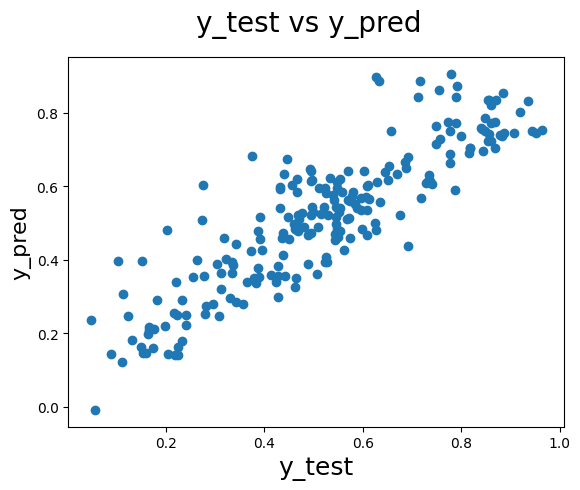

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [ ]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7730769910986955

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

#### Checking the correlations between the final predictor variables

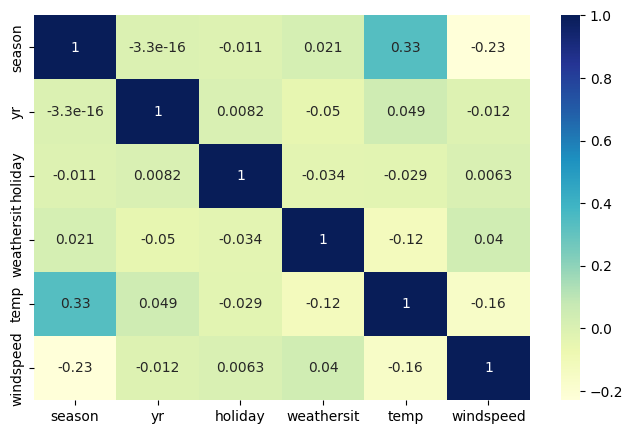

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.

